# 코너 검출
- 밝기 차이를 이용해서 코너(엣지)를 구분

In [23]:
import numpy as np
import cv2

In [24]:
src = cv2.imread('img/building.jpg', cv2.IMREAD_GRAYSCALE)
src.shape
cv2.imshow('src',src)
cv2.waitKey()
cv2.destroyAllWindows()

# Harris 코너 검출

In [25]:
harris = cv2.cornerHarris(src, 3, 3, 0.04)
harris_norm = cv2.normalize(harris,
                            None,
                            0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [26]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
dst.shape

(600, 868, 3)

In [27]:
for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                if (harris[y, x] > harris[y-1, x] and
                        harris[y, x] > harris[y-1, x] and
                        harris[y, x] > harris[y-1, x] and
                        harris[y, x] > harris[y-1, x]):
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

cv2.imshow('src', src)
cv2.imshow('harris_norm', harris_norm)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# FAST 코너 검출
- Features Accelerated Segment Test 방식의 코너 검출
- 빠른 검출이 특징

In [29]:
src = cv2.imread('img/building.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(60)
keypoints = fast.detect(src)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst, pt, 5, (0, 0, 255), 2)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# SIFT : Scale-Invariant Feature Transform, 크기 불변 특징점
- 이미지의 스케일 변화 시 특징점(코너)가 검출 되지 않을 수 있음
- 이를 해결하기 위한 여러 기술을 활용함 : 옥타브 등

### **특징점 기술자(특징 벡터)** : 특징점 주변 영상의 특성을 여러 개의 실수 값으로 표현한 것을 의미
```
코너를 검출하다 보면 이미지 스케일 변화(이미지 피라미드 등)에 의해 특징점(코너)의 특징이 약해지면서 검출이 안 될수 있는데 이를 해결하기 위해 SIFT(Scaled-Invariant Feature Transform) 개념이 나옴

여기서 특징점 기술자 혹은 특징 벡터라는 표현이 나오는데 특징점 주변 영상의 특성을 실수값으로 표현한 것을 의미

이를 통해 코너를 고정해서 확인이 가능함
```

## FastFeatureDetector -> 키포인트 검출

In [33]:
import cv2
import numpy as np

img = cv2.imread('./img/building.jpg')
print(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# FASt 특징 검출기 생성 ---①
fast = cv2.FastFeatureDetector_create(50)
# 키 포인트 검출 ---②
keypoints = fast.detect(gray, None)
# 키 포인트 그리기 ---③
img = cv2.drawKeypoints(img, keypoints, None)
# 결과 출력 ---④
cv2.imshow('FAST', img)
cv2.waitKey()
cv2.destroyAllWindows()

[[[  0   0   5]
  [  0   2   7]
  [  2   3   7]
  ...
  [207 223 230]
  [208 224 231]
  [209 225 232]]

 [[  0   0   6]
  [  1   2   6]
  [  1   2   6]
  ...
  [206 222 229]
  [206 222 229]
  [206 222 229]]

 [[  2   1   5]
  [  2   1   3]
  [  1   0   2]
  ...
  [209 225 232]
  [209 225 232]
  [208 224 231]]

 ...

 [[ 42  82  70]
  [ 38  78  66]
  [ 35  73  61]
  ...
  [ 17  32  24]
  [ 17  32  24]
  [ 16  31  23]]

 [[ 43  83  71]
  [ 38  78  66]
  [ 34  72  60]
  ...
  [ 12  27  19]
  [ 13  28  20]
  [ 13  28  20]]

 [[ 44  84  72]
  [ 38  78  66]
  [ 32  70  58]
  ...
  [  8  23  15]
  [  9  24  16]
  [  9  24  16]]]


## SimpleBlobDetector -> 키포인트 검출

In [1]:
import cv2
import numpy as np
 
img = cv2.imread("./img/building.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SimpleBlobDetector 생성 ---①
detector = cv2.SimpleBlobDetector_create()
# 키 포인트 검출 ---②
keypoints = detector.detect(gray)
# 키 포인트를 빨간색으로 표시 ---③
img = cv2.drawKeypoints(img, keypoints, None, (0,0,255),\
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
cv2.imshow("Blob", img)
cv2.waitKey()
cv2.destroyAllWindows()

## SURF추출기 -> 키포인트 검출
-> 현재 이 방식은 특허 관련 문제로 불가

In [1]:
import cv2
import numpy as np

img = cv2.imread("./img/building.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SURF 추출기 생성 ( 경계:1000, 피라미드:3, 서술자확장:True, 방향적용:True)
surf = cv2.xfeatures2d.SURF_create(1000, 3, extended=True, upright=True)
# 키 포인트 검출 및 서술자 계산
keypoints, desc = surf.detectAndCompute(gray, None)
print(desc.shape, desc)
# 키포인트 이미지에 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SURF', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


# match : 특징벡터를 토대로 비슷한 지점들을 자신이 설정한 임계값을 기준으로 추출해서 연결해줌

- 아래는 잘된 예시<br>
[참고자료] https://drive.google.com/drive/folders/1-BWChMPiac8HeGWD4eM9w2LyRmHP2_2E
<br>
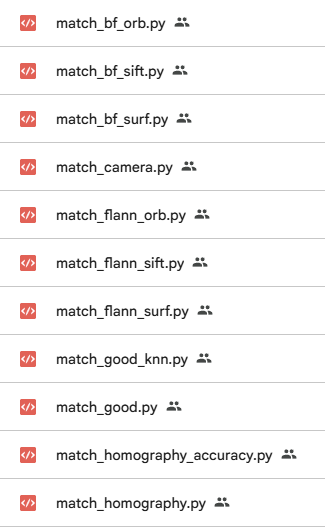
<br> 정말 다양한 방식의 매칭이 가능

In [ ]:
import cv2, numpy as np

img1 = cv2.imread('./img/img2.jpg')
img2 = cv2.imread('./img/img3.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB로 서술자 추출 ---①
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
# BF-Hamming으로 매칭 ---②
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# 매칭 결과를 거리기준 오름차순으로 정렬 ---③
matches = sorted(matches, key=lambda x:x.distance)
# 최소 거리 값과 최대 거리 값 확보 ---④
min_dist, max_dist = matches[0].distance, matches[-1].distance
# 최소 거리의 15% 지점을 임계점으로 설정 ---⑤
ratio = 0.2
good_thresh = (max_dist - min_dist) * ratio + min_dist
# 임계점 보다 작은 매칭점만 좋은 매칭점으로 분류 ---⑥
good_matches = [m for m in matches if m.distance < good_thresh]
print('matches:%d/%d, min:%.2f, max:%.2f, thresh:%.2f' \
        %(len(good_matches),len(matches), min_dist, max_dist, good_thresh))
# 좋은 매칭점만 그리기 ---⑦
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 결과 출력
cv2.imshow('Good Match', res)
cv2.waitKey()
cv2.destroyAllWindows()

matches:22/175, min:19.00, max:76.00, thresh:30.40


# 웹캠으로 사진 2장을 캡쳐한 후 매치하는 모듈

In [3]:
import cv2

def capture_image(cap, window_name):
    """웹캠에서 이미지를 캡처하는 함수"""
    while True:
        ret, frame = cap.read()
        if not ret:
            print("웹캠 프레임을 읽을 수 없습니다.")
            return None
        
        cv2.imshow(window_name, frame)
        
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):  # 'q'로 종료
            return None
        elif key == ord('1') or key == ord('2'):  # '1' 또는 '2'로 캡처
            print(f"사진 {key - ord('0')} 캡처 완료!")
            return frame

def match_images(img1, img2):
    """두 이미지 간 특징점 매칭 수행"""
    # 그레이스케일 변환
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # ORB 검출기 생성
    orb = cv2.ORB_create()
    
    # 키포인트와 디스크립터 추출
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)
    
    # BFMatcher로 매칭 (Brute Force Matcher)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    
    # 매칭 결과 정렬 (거리 기준)
    matches = sorted(matches, key=lambda x: x.distance)
    
    # 상위 10% 매칭만 그리기 (조정 가능)
    good_matches = matches[:int(len(matches) * 0.2)]
    
    # 매칭 결과 이미지 생성
    result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return result

if __name__ == "__main__":
    # 웹캠 열기 (0: 기본 웹캠)
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("웹캠을 열 수 없습니다.")
        exit()
    
    print("웹캠이 열렸습니다. '1'으로 첫 번째 사진, '2'로 두 번째 사진을 찍으세요. 'q'로 종료.")
    
    # 첫 번째 이미지 캡처
    img1 = capture_image(cap, "press_no1_to_capture")
    if img1 is None:
        cap.release()
        cv2.destroyAllWindows()
        exit()
    
    # 두 번째 이미지 캡처
    img2 = capture_image(cap, "press_no2_to_capture")
    if img2 is None:
        cap.release()
        cv2.destroyAllWindows()
        exit()
    
    # 매칭 수행 및 결과 표시
    result = match_images(img1, img2)
    cv2.imshow("match", result)
    
    # 결과 창에서 'q' 누를 때까지 대기
    while True:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # 정리
    cap.release()
    cv2.destroyAllWindows()

웹캠이 열렸습니다. '1'으로 첫 번째 사진, '2'로 두 번째 사진을 찍으세요. 'q'로 종료.
사진 1 캡처 완료!
사진 2 캡처 완료!


## 아래 구글 드라이브에 있는 수많은 기능들을 잘 활용해 어떤 기술을 사용할 지 결정 필요 <br>
https://drive.google.com/drive/folders/1-BWChMPiac8HeGWD4eM9w2LyRmHP2_2E